In [12]:
# https://www.youtube.com/watch?v=qQ8vS2btsxI

![Screenshot 2024-01-06 at 12.25.48 PM.png](<attachment:Screenshot 2024-01-06 at 12.25.48 PM.png>)
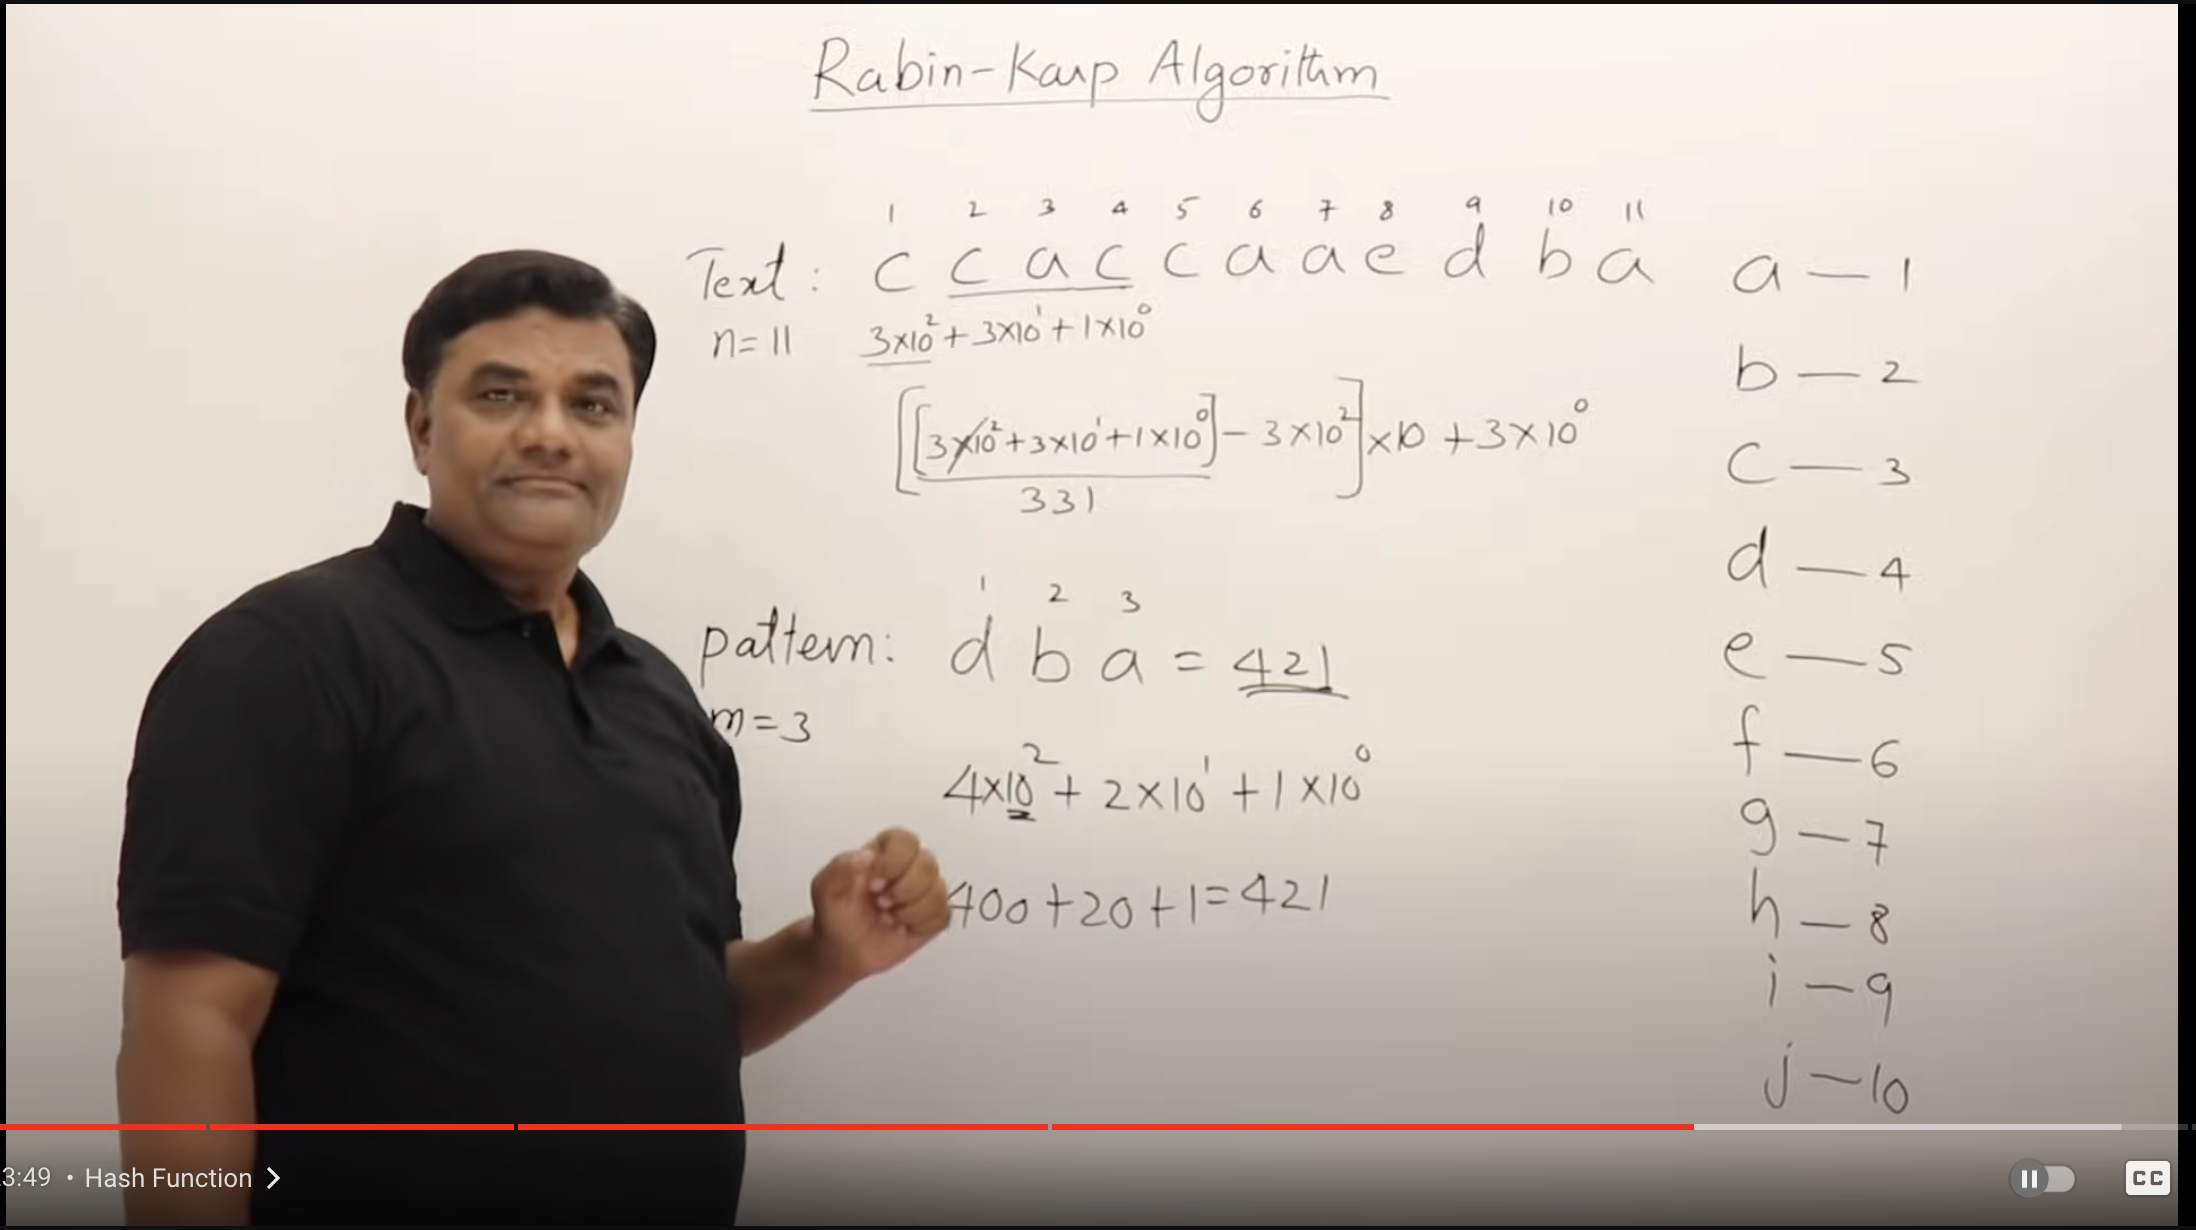

In [13]:
BASE = 31
# if BASE = character space, then there will be 0 collisions
# a lower BASE could result in some collisions
# eg 8*10 + 4*1 = 4*10 + 44*1

MOD = 10**9 + 7 
# a lower mod will increase collisions (rolling_hash being equal to pattern_hash)
# while rolling string not equal to pattern, as a result check_equal will be called more times

def hash_char(ch):
    return ord(ch) - ord('A') + 1

def get_power(n: int):
    power = [1] * n

    for i in range(1, n):
        power[i] = (BASE * power[i - 1]) % MOD
    return power

def get_hash(string):
    n = len(string)
    power = get_power(n)
    sum_hash = 0
    
    for i in range(n):
        sum_hash = (sum_hash + (hash_char(string[i]) * power[n - 1 - i]) % MOD) % MOD
    
    return sum_hash

def check_equal(string, pattern, start, n):
    return all(string[i + start] == pattern[i] for i in range(n))

def string_match(string, pattern):
    n, m = len(pattern), len(string)
    
    power = get_power(n)
    ans = []
    
    pattern_hash = get_hash(pattern)
    rolling_hash = get_hash(string[:n])

    l, r = 0, n - 1
    
    while r < m:
        if pattern_hash == rolling_hash and check_equal(string, pattern, l, n):
            ans.append(l)
        
        left = string[l]
        
        # Remove left character
        rolling_hash = (rolling_hash - (hash_char(left) * power[n - 1]) % MOD + MOD) % MOD
        
        l += 1
        r += 1
        
        if r < m:
            right = string[r]
            
            # Right Shift
            rolling_hash = ((rolling_hash * BASE) % MOD 
                            + (hash_char(right) * power[0]) % MOD) % MOD

    return ans


In [14]:
string_input = "ababcababc"
pattern_input = "ababc"
result = string_match(string_input, pattern_input)
print(result)

[0, 5]


In [15]:
'''
if BASE == number of unique characters in space
then check_equal(string, pattern, l, n) is not needed
as rolling hash won't ever be equal to pattern hash, if rolling string is not same as pattern

what we are doing here is similar to binary number system
if the bits are not same, then the decimal number represented by them can't be equal
'''

"\nif BASE == number of unique characters in space\nthen check_equal(string, pattern, l, n) is not needed\nas rolling hash won't ever be equal to pattern hash, if rolling string is not same as pattern\n\nwhat we are doing here is similar to binary number system\nif the bits are not same, then the decimal number represented by them can't be equal\n"

In [16]:
# there are 26 lowercase english characters

BASE = 26


def hash_char(ch):
    return ord(ch) - ord('a') + 1


def get_power(n: int):
    power = [1] * n

    for i in range(1, n):
        power[i] = BASE * power[i - 1]
    return power


def get_hash(string):
    n = len(string)
    power = get_power(n)
    sum_hash = 0

    for i in range(n):
        sum_hash = (sum_hash + (hash_char(string[i]) * power[n - 1 - i]))

    return sum_hash


def string_match(string, pattern):
    n, m = len(pattern), len(string)

    power = get_power(n)
    ans = []

    pattern_hash = get_hash(pattern)
    rolling_hash = get_hash(string[:n])

    l, r = 0, n - 1

    while r < m:
        if pattern_hash == rolling_hash:
            ans.append(l)

        left = string[l]

        # Remove left character
        rolling_hash = rolling_hash - hash_char(left) * power[n - 1]

        l += 1
        r += 1

        if r < m:
            right = string[r]

            # Right Shift
            rolling_hash = rolling_hash * BASE \
                            + hash_char(right) * power[0]

    return ans

In [17]:
string_input = "ababcababc"
pattern_input = "ababc"
result = string_match(string_input, pattern_input)
print(result)

[0, 5]
